Homework 4: Sentiment Analysis - Task 3
----

Names
----
Names: __Adrian Criollo__ (Write these in every notebook you submit.)

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.

Logistic regression is used for binary classification, but can be extended for multi-class classification

Read more about logistic regression here - https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/.

Recall from task 2 what binarized and multinomial mean here: a __binarized__ bag of words representation is one where we put 1 [true] if the word is there and 0 [false] otherwise, and a __multinomial__ bag of words representation is one where we put the count of the word if the word occurs, and 0 otherwise.

**10 points in Task 5 will be allocated for all 9 graphs (including the one generated here in Task 3 for Logistic Regression) being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents


In [1]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter, defaultdict
import time
import sentiment_utils as sutils
from typing import List, Tuple
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# some variables you may want to use
# BINARIZED = True
# USE_COUNT_VECTORIZER = False

In [5]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.
def custom_bow_vectorizer(docs: List[str], binary: bool = False) -> Tuple[List[List[int]], List[str]]:
    """
    Custom Bag-of-Words vectorizer that converts documents into a feature matrix.
    
    Args:
        docs: List of documents (strings) to be vectorized.
        binary: If True, use binarized features (1 if word is present, 0 if absent).
                If False, use counts of word occurrences (multinomial).
    
    Returns:
        A tuple containing:
        - The feature matrix (2D list) where each row represents a document and each column represents a word.
        - A list of feature names (words in the vocabulary).
    """
    vocab = defaultdict(int)
    
    # Build vocabulary
    for doc in docs:
        for word in doc.split():
            vocab[word] += 1

    # Convert vocab to list for consistent ordering
    vocab_list = sorted(vocab.keys())
    vocab_index = {word: idx for idx, word in enumerate(vocab_list)}
    
    # Create the feature matrix
    feature_matrix = []
    for doc in docs:
        vector = np.zeros(len(vocab_list))
        word_count = defaultdict(int)
        
        # Count words or mark presence
        for word in doc.split():
            word_count[word] += 1
            
        for word, count in word_count.items():
            if binary:
                vector[vocab_index[word]] = 1  # Binarized feature (1 if present)
            else:
                vector[vocab_index[word]] = count  # Multinomial feature (word count)
                
        feature_matrix.append(vector.tolist())
    
    return feature_matrix, vocab_list

def sklearn_bow_vectorizer(docs: List[str], binary: bool = False) -> Tuple[np.ndarray, List[str]]:
    """
    Use sklearn's CountVectorizer to vectorize documents.
    
    Args:
        docs: List of documents (strings) to be vectorized.
        binary: If True, use binarized features (1 if word is present, 0 if absent).
                If False, use counts of word occurrences (multinomial).
    
    Returns:
        A tuple containing:
        - The feature matrix (numpy array) where each row represents a document and each column represents a word.
        - A list of feature names (words in the vocabulary).
    """
    vectorizer = CountVectorizer(binary=binary)
    X = vectorizer.fit_transform(docs)
    
    return X.toarray(), vectorizer.get_feature_names_out()


def train_and_evaluate_logistic_regression(X_train, y_train, X_dev, y_dev):
    """
    Train a Logistic Regression model and evaluate it on the dev set.
    
    Args:
        X_train: Feature matrix for training data.
        y_train: Labels for training data.
        X_dev: Feature matrix for dev data.
        y_dev: Labels for dev data.
    
    Returns:
        A dictionary containing precision, recall, f1, and accuracy scores.
    """
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict on the dev set
    y_pred = model.predict(X_dev)
    
    # Calculate performance metrics
    precision = precision_score(y_dev, y_pred, average='binary')
    recall = recall_score(y_dev, y_pred, average='binary')
    f1 = f1_score(y_dev, y_pred, average='binary')
    accuracy = accuracy_score(y_dev, y_pred)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

In [7]:
# how much time does it take to featurize the all data with your implementation?

train_docs, train_labels = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_docs, dev_labels = sutils.generate_tuples_from_file(DEV_FILE)

# Start timing
start = time.time()

# Custom BoW vectorization for all training data
X_train_custom, vocab_custom = custom_bow_vectorizer([' '.join(doc) for doc in train_docs], binary=False)

# Custom BoW vectorization for all dev data
X_dev_custom, _ = custom_bow_vectorizer([' '.join(doc) for doc in dev_docs], binary=False)

# End timing
end = time.time()
print("That took:", end - start, "seconds")



That took: 1.3419620990753174 seconds


In [9]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?

start = time.time()


# YOUR CODE HERE
# Use sklearn's CountVectorizer to featurize all training data (assume train_tups contains (doc, label) tuples)
# Assume generate_tuples_from_file returns two lists: tokenized docs (X) and labels (y)
train_docs, train_labels = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_docs, dev_labels = sutils.generate_tuples_from_file(DEV_FILE)

# Join tokenized words into a single string for each document
train_docs_joined = [' '.join(doc) for doc in train_docs]
dev_docs_joined = [' '.join(doc) for doc in dev_docs]

# Time the featurization process with sklearn's CountVectorizer
start = time.time()

# Use sklearn's CountVectorizer to featurize all training data
vectorizer = CountVectorizer(binary=False)  # Set binary=True if you want binarized features
X_train_sklearn = vectorizer.fit_transform(train_docs_joined)

# Featurize all dev data using the same vectorizer
X_dev_sklearn = vectorizer.transform(dev_docs_joined)

end = time.time()
print("That took:", end - start, "seconds")

# Using the custom BoW vectorizer
X_train_custom, vocab_custom = custom_bow_vectorizer(train_docs_joined, binary=False)

# The size of your custom vocabulary
custom_vocab_size = len(vocab_custom)
print("Vocabulary size using custom vectorizer:", custom_vocab_size)

# The size of sklearn's vocabulary
sklearn_vocab_size = len(vectorizer.get_feature_names_out())
print("Vocabulary size using CountVectorizer:", sklearn_vocab_size)

That took: 0.5326023101806641 seconds
Vocabulary size using custom vectorizer: 30705
Vocabulary size using CountVectorizer: 22596


1. How big is your vocabulary using your vectorization function(s)? __YOUR ANSWER HERE__
2. How big is your vocabulary using the `CountVectorizer`? __YOUR ANSWER HERE__

In [12]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

# YOUR CODE HERE
def calculate_sparsity(feature_matrix) -> float:
    """
    Calculate the average percentage of zero entries in a vectorized feature matrix.
    
    Args:
        feature_matrix: 2D list or numpy array where each row is a vectorized document.
    
    Returns:
        The average percentage of zeros across all document vectors.
    """
    # Convert the feature matrix to a numpy array for easier computation
    feature_matrix = np.array(feature_matrix)
    
    # Calculate the total number of entries in each row (document vector)
    total_entries_per_vector = feature_matrix.shape[1]
    
    # Calculate the percentage of zeros for each row
    zero_percentages = np.sum(feature_matrix == 0, axis=1) / total_entries_per_vector * 100
    
    # Return the average percentage of zeros across all rows
    return np.mean(zero_percentages)

# Example usage with your vectorized data
# For custom BoW vectorizer
print("Sparsity in custom BoW representation:")
custom_sparsity = calculate_sparsity(X_train_custom)
print(f"Average % of zero entries: {custom_sparsity:.2f}%")

# For sklearn's CountVectorizer
print("\nSparsity in sklearn CountVectorizer representation:")
sklearn_sparsity = calculate_sparsity(X_train_sklearn.toarray())  # Convert sparse matrix to dense array
print(f"Average % of zero entries: {sklearn_sparsity:.2f}%")
# Print out the average % of entries that are zeros in each vector in the vectorized training data
# YOUR CODE HERE

Sparsity in custom BoW representation:
Average % of zero entries: 99.51%

Sparsity in sklearn CountVectorizer representation:
Average % of zero entries: 99.39%


Training data percentage: 10%
Precision: 0.7129, Recall: 0.6857, F1 Score: 0.6990, Accuracy: 0.6900

Training data percentage: 20%
Precision: 0.7757, Recall: 0.7905, F1 Score: 0.7830, Accuracy: 0.7700

Training data percentage: 30%
Precision: 0.7818, Recall: 0.8190, F1 Score: 0.8000, Accuracy: 0.7850

Training data percentage: 40%
Precision: 0.7925, Recall: 0.8000, F1 Score: 0.7962, Accuracy: 0.7850

Training data percentage: 50%
Precision: 0.8113, Recall: 0.8190, F1 Score: 0.8152, Accuracy: 0.8050

Training data percentage: 60%
Precision: 0.8113, Recall: 0.8190, F1 Score: 0.8152, Accuracy: 0.8050

Training data percentage: 70%
Precision: 0.8131, Recall: 0.8286, F1 Score: 0.8208, Accuracy: 0.8100

Training data percentage: 80%
Precision: 0.8095, Recall: 0.8095, F1 Score: 0.8095, Accuracy: 0.8000

Training data percentage: 90%
Precision: 0.7838, Recall: 0.8286, F1 Score: 0.8056, Accuracy: 0.7900

Training data percentage: 100%
Precision: 0.7748, Recall: 0.8190, F1 Score: 0.7963, Accurac

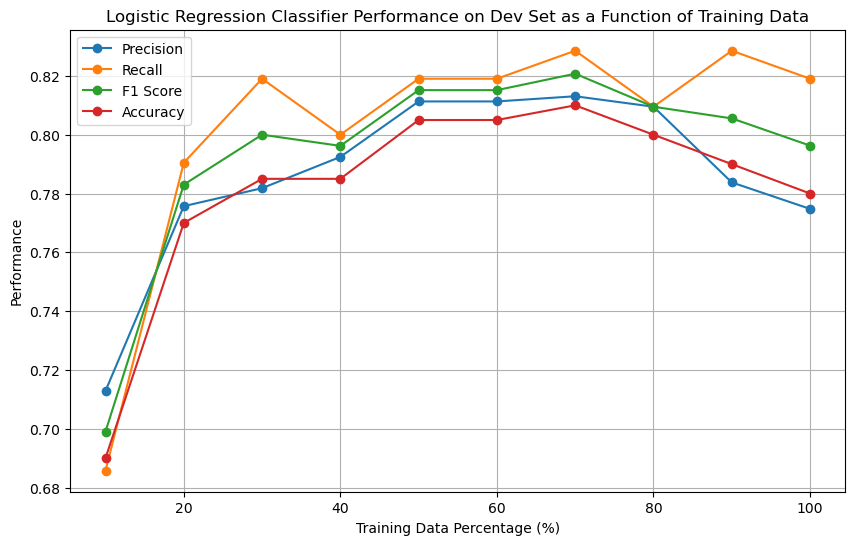

In [13]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

# Example using sklearn's CountVectorizer
train_docs_joined = [' '.join(doc) for doc in train_docs]
dev_docs_joined = [' '.join(doc) for doc in dev_docs]

# Use CountVectorizer to transform documents into features
vectorizer = CountVectorizer(binary=False)
X_train_vectorized = vectorizer.fit_transform(train_docs_joined).toarray()
X_dev_vectorized = vectorizer.transform(dev_docs_joined).toarray()

# Combine features and labels for training and dev sets
train_feats = [(X_train_vectorized[i], train_labels[i]) for i in range(len(train_docs))]
dev_feats = [(X_dev_vectorized[i], dev_labels[i]) for i in range(len(dev_docs))]

# Create the training graph for Logistic Regression
sutils.create_training_graph(sutils.logistic_regression_metrics_fun, train_feats, dev_feats, kind="Logistic Regression", savepath="logistic_regression_graph.png", verbose=True)


Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: __enter your final f1 score here__
- CountVectorizer features, multinomial: __enter your final f1 score here__
- your vectorized features, binarized: __enter your final f1 score here__
- CountVectorizer features, binarized: __enter your final f1 score here__

Produce your graph(s) for the combination with the best final f1 score.


